<a href="https://colab.research.google.com/github/Amana28/Facial-Feature-Detector/blob/master/Amana_Wasay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Importing our Dataset

In [2]:
# Mount Google Drive containing CelebA dataset 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Add dataset directory
dataset_folder = '/content/drive/MyDrive/CelebA'

# Check contents of the directory
os.listdir(dataset_folder)

Mounted at /content/drive


['img_align_celeba.zip', 'Eval', 'Anno']

In [3]:
# Unzip CelebA dataset
!unzip -q drive/MyDrive/CelebA/img_align_celeba.zip

In [4]:
# Images folder
img_folder = 'img_align_celeba'
dataset_size = 50000
 
# Create a list of filenames in our dataset 
img_filenames = sorted(os.listdir(img_folder))[:dataset_size]

# Checking the number of Images in our Dataset
num_images = len(img_filenames) 


print("Size of our dataset: " + len(img_filenames) + "First element: " + img_filenames[0]

'000001.jpg'

# Exploring our Dataset

In [5]:
# Read the attributes file into a pandas DataFrame
attributes_df = pd.read_csv(dataset_folder + '/Anno/list_attr_celeba.txt', delim_whitespace=True, skiprows=1)

attributes_df = attributes_df[:dataset_size]

attributes_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
049996.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1
049997.jpg,-1,-1,1,-1,-1,1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1
049998.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
049999.jpg,-1,1,1,1,-1,-1,1,1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,-1,1


# Visualizing our data

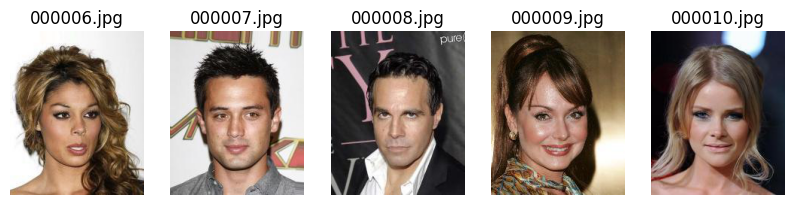

In [6]:
# Display 5 Images from our dataset

img_list = img_filenames[5:10]

fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for i, img_file in enumerate(img_list):
    img = plt.imread(img_folder + "/" + img_file)
    axs[i].imshow(img)
    axs[i].set_title(img_file)
    axs[i].axis('off')
plt.show()

### Displaying 5 Random 'Attractive' faces

img_align_celeba/033143.jpg
img_align_celeba/006867.jpg
img_align_celeba/014054.jpg
img_align_celeba/025237.jpg
img_align_celeba/016431.jpg


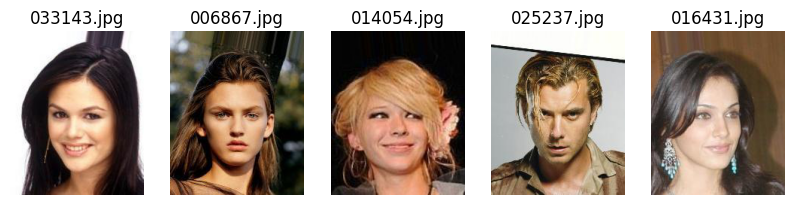

In [7]:
# Set the seed for reproducibility
np.random.seed(7)

# Filter the dataframe to only attractive people
attractive_df = attributes_df[attributes_df['Attractive'] == 1]
not_attractive_df = attributes_df[attributes_df['Attractive'] == -1]

# Get a random sample of 5 attractive people
sample_attr_df = attractive_df.sample(n=5)
sample_not_attr_df = not_attractive_df.sample(n=5)

# Display the images
fig, axs = plt.subplots(1, 5, figsize=(10, 3))

img_index = 0
for image_id, row in sample_attr_df.head(5).iterrows():
    print(img_folder + '/' +image_id)
    img = plt.imread(img_folder + '/' +image_id)
    axs[img_index].imshow(img)
    axs[img_index].set_title(image_id)
    axs[img_index].axis('off')
    img_index += 1

plt.show()

### Display 5 Random 'non attractive' faces

---



img_align_celeba/028650.jpg
img_align_celeba/006928.jpg
img_align_celeba/007325.jpg
img_align_celeba/044800.jpg
img_align_celeba/030106.jpg


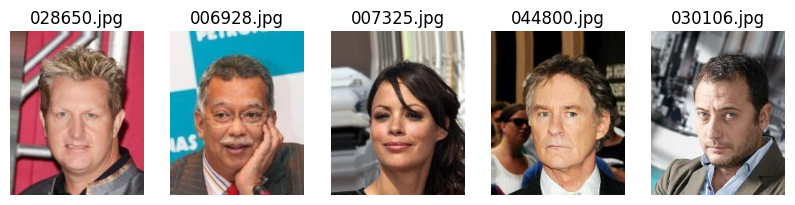

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3))

img_index = 0
for image_id, row in sample_not_attr_df.head(5).iterrows():
    print(img_folder + '/' +image_id)
    img = plt.imread(img_folder + '/' +image_id)
    axs[img_index].imshow(img)
    axs[img_index].set_title(image_id)
    axs[img_index].axis('off')
    img_index += 1

plt.show()

# Preprocessing our Data

In [9]:
# Creating numpy array of size (num_images, height, width, channels) - takes about 10 minutes

# Define the target image size
target_size = (64, 64)

# Define the number of channels
num_channels = 3

# Create an empty array to hold the images
x = np.empty((num_images, *target_size, num_channels), dtype=np.float32)

# Iterate over the image filenames
for i, img_filename in enumerate(img_filenames):
    # Load the image and resize it
    img_path = os.path.join(img_folder, img_filename)
    img = Image.open(img_path).resize(target_size)

    # Convert the image to a NumPy array
    img_array = np.array(img, dtype=np.float32)

    # Normalize the pixel values to the range [0, 1]
    img_array /= 255.0

    # Add the image to the array
    x[i] = img_array

    if ((i+1) % 2500 == 0):
      print("Progress: " + str(((i+1)/num_images * 100)) + " %")


Progress: 5.0 %
Progress: 10.0 %
Progress: 15.0 %
Progress: 20.0 %
Progress: 25.0 %
Progress: 30.0 %
Progress: 35.0 %
Progress: 40.0 %
Progress: 45.0 %
Progress: 50.0 %
Progress: 55.00000000000001 %
Progress: 60.0 %
Progress: 65.0 %
Progress: 70.0 %
Progress: 75.0 %
Progress: 80.0 %
Progress: 85.0 %
Progress: 90.0 %
Progress: 95.0 %
Progress: 100.0 %


In [10]:
print('Shape of x:', x.shape)

Shape of x: (50000, 64, 64, 3)


In [11]:
x[0]

array([[[0.99215686, 0.90588236, 0.7607843 ],
        [0.99215686, 0.90588236, 0.7607843 ],
        [0.99215686, 0.90588236, 0.7607843 ],
        ...,
        [0.7372549 , 0.62352943, 0.40392157],
        [0.9647059 , 0.89411765, 0.7607843 ],
        [1.        , 0.92941177, 0.8901961 ]],

       [[0.99215686, 0.90588236, 0.7607843 ],
        [0.99215686, 0.90588236, 0.7607843 ],
        [0.99215686, 0.90588236, 0.7607843 ],
        ...,
        [0.8       , 0.6901961 , 0.49803922],
        [0.9843137 , 0.9254902 , 0.8117647 ],
        [0.99215686, 0.92941177, 0.8784314 ]],

       [[0.99215686, 0.90588236, 0.7607843 ],
        [0.99215686, 0.90588236, 0.7607843 ],
        [0.99215686, 0.90588236, 0.7607843 ],
        ...,
        [0.8666667 , 0.76862746, 0.62352943],
        [0.9882353 , 0.94509804, 0.8666667 ],
        [0.9843137 , 0.92941177, 0.87058824]],

       ...,

       [[0.7882353 , 0.53333336, 0.34509805],
        [0.7372549 , 0.4745098 , 0.30588236],
        [0.5176471 , 0

In [13]:
# Creating our target variable y -- indexed by image id
y_df = attributes_df.loc[:, ["Attractive"]][:dataset_size]
y = y_df.to_numpy()

In [17]:
# Replacing -1 with 0 in y
y = np.where(y == -1, 0, y)

In [20]:
# Splitting x and y into train, valid, test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
x_train, x_val,  y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [23]:
# Define a CNN model architecture 

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1000/1000 [==============================] - 20s 7ms/step - loss: 0.5299 - accuracy: 0.7308 - val_loss: 0.4783 - val_accuracy: 0.7669
Epoch 2/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4670 - accuracy: 0.7757 - val_loss: 0.4731 - val_accuracy: 0.7715
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4537 - accuracy: 0.7818 - val_loss: 0.4551 - val_accuracy: 0.7796
Epoch 4/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4369 - accuracy: 0.7928 - val_loss: 0.4446 - val_accuracy: 0.7853
Epoch 5/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4267 - accuracy: 0.7946 - val_loss: 0.4446 - val_accuracy: 0.7893
Epoch 6/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4143 - accuracy: 0.8040 - val_loss: 0.4558 - val_accuracy: 0.7812
Epoch 7/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4037 - accuracy: 0.8108 - val_loss: 0.4501 - val_accuracy

In [26]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - loss: 0.4884 - accuracy: 0.7828 - 1s/epoch - 3ms/step
Test accuracy: 0.782800018787384
